In [1]:
#!pip3 install pandas
#!pip3 install pandas-profiling
#!pip3 install matplotlib
#!pip3 install seaborn

In [2]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling.describe import describe


'\n%matplotlib inline\n\nimport matplotlib\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport pandas_profiling\nfrom pandas_profiling.describe import describe\n'

In [3]:
df = pd.read_csv('2017_ACCIDENTES_DE_TR_NSITO_BOGOT_.csv')
df.head()

,Accidente,Día,Fecha,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,...,CausaVehiculoIICod,CausaVehiculoIIDesc,CausaPasajeroICod,CausaPasajeroIDesc,CausaPasajeroIICod,CausaPasajeroIIDesc,CausaViaICod,CausaViaIDesc,CausaViaIICod,CausaViaIIDesc
0,4480506,SÁBADO,04/29/2017 12:00:00 AM,11001000,2,Con Heridos,2,Atropello,,,...,,,,,,,,,,
1,4480511,MIÉRCOLES,05/03/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,,,,,,,,,,
2,4480666,VIERNES,05/05/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,,,,,,,,,,
3,4480721,SÁBADO,05/06/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,,,,,,,,,,
4,4480727,SÁBADO,05/06/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,,,,,,,,,,


In [4]:
df['fecha_oc'] = df['FechaOcurrencia']
df['hora_oc'] = df['HoraOcurrencia']
df['fecha_hora_oc'] = df['FechaOcurrencia'].str[:10] + ' '+ df['HoraOcurrencia'].str[11:]
df['event_time'] = pd.to_datetime(df['fecha_hora_oc'], format='%m/%d/%Y %I:%M:%S %p')
df['event_date'] =  df['event_time'].dt.strftime('%Y-%m-%d')
df['event_hour'] = df['event_time'].dt.strftime('%H')
df['event_day'] = df['event_time'].dt.strftime('%w')
df['event_day_name'] = df['event_time'].dt.strftime('%A')
df['event_month'] = df['event_time'].dt.strftime('%m')
df['event_month_name'] = df['event_time'].dt.strftime('%B')


In [5]:
df.head(5)

,Accidente,Día,Fecha,Oficina,GravedadCod,GravedadNombre,ClaseCodigo,ClaseNombre,ChoqueCodigo,ChoqueNombre,...,fecha_oc,hora_oc,fecha_hora_oc,event_time,event_date,event_hour,event_day,event_day_name,event_month,event_month_name
0,4480506,SÁBADO,04/29/2017 12:00:00 AM,11001000,2,Con Heridos,2,Atropello,,,...,04/29/2017 12:00:00 AM,12/31/1899 03:40:00 PM,04/29/2017 03:40:00 PM,2017-04-29 15:40:00,2017-04-29,15,6,Saturday,04,April
1,4480511,MIÉRCOLES,05/03/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,05/03/2017 12:00:00 AM,12/31/1899 01:30:00 PM,05/03/2017 01:30:00 PM,2017-05-03 13:30:00,2017-05-03,13,3,Wednesday,05,May
2,4480666,VIERNES,05/05/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,05/05/2017 12:00:00 AM,12/31/1899 11:45:00 AM,05/05/2017 11:45:00 AM,2017-05-05 11:45:00,2017-05-05,11,5,Friday,05,May
3,4480721,SÁBADO,05/06/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,05/06/2017 12:00:00 AM,12/31/1899 10:00:00 AM,05/06/2017 10:00:00 AM,2017-05-06 10:00:00,2017-05-06,10,6,Saturday,05,May
4,4480727,SÁBADO,05/06/2017 12:00:00 AM,11001000,2,Con Heridos,1,Choque,1,Vehiculo,...,05/06/2017 12:00:00 AM,12/31/1899 07:10:00 AM,05/06/2017 07:10:00 AM,2017-05-06 07:10:00,2017-05-06,07,6,Saturday,05,May


In [6]:
df.isnull().sum() 

Accidente                0
Día                      0
Fecha                    0
Oficina                  0
GravedadCod              0
GravedadNombre           0
ClaseCodigo              0
ClaseNombre              0
ChoqueCodigo             0
ChoqueNombre             0
ObjetoFijoCodigo         0
ObjetoFijoNombre         0
OtraClase                0
NombreOtraClase          0
Latitud                  0
Longitud                 0
Direccion                0
TipoVia1                 0
NumeroVia1               4
LetraVia1                0
CardinalVia1             0
TipoVia2                 0
NumeroVia2              20
LetraVia2                0
CardinalVia2             0
Complemento              4
Municipio                0
Localidad                0
FechaOcurrencia          0
HoraOcurrencia           0
                        ..
CausaConductorICo        0
CausaConductorIDesc      0
CausaConductorIICod      0
CausaConductorIIDesc     0
CausaPeatonICod          0
CausaPeatonIDesc         0
C

In [7]:
df.isnull().sum() / len(df) * 100

Accidente               0.000000
Día                     0.000000
Fecha                   0.000000
Oficina                 0.000000
GravedadCod             0.000000
GravedadNombre          0.000000
ClaseCodigo             0.000000
ClaseNombre             0.000000
ChoqueCodigo            0.000000
ChoqueNombre            0.000000
ObjetoFijoCodigo        0.000000
ObjetoFijoNombre        0.000000
OtraClase               0.000000
NombreOtraClase         0.000000
Latitud                 0.000000
Longitud                0.000000
Direccion               0.000000
TipoVia1                0.000000
NumeroVia1              0.011364
LetraVia1               0.000000
CardinalVia1            0.000000
TipoVia2                0.000000
NumeroVia2              0.056818
LetraVia2               0.000000
CardinalVia2            0.000000
Complemento             0.011364
Municipio               0.000000
Localidad               0.000000
FechaOcurrencia         0.000000
HoraOcurrencia          0.000000
          

In [8]:
list(df)

['Accidente',
 'Día',
 'Fecha',
 'Oficina',
 'GravedadCod',
 'GravedadNombre',
 'ClaseCodigo',
 'ClaseNombre',
 'ChoqueCodigo',
 'ChoqueNombre',
 'ObjetoFijoCodigo',
 'ObjetoFijoNombre',
 'OtraClase',
 'NombreOtraClase',
 'Latitud',
 'Longitud',
 'Direccion',
 'TipoVia1',
 'NumeroVia1',
 'LetraVia1',
 'CardinalVia1',
 'TipoVia2',
 'NumeroVia2',
 'LetraVia2',
 'CardinalVia2',
 'Complemento',
 'Municipio',
 'Localidad',
 'FechaOcurrencia',
 'HoraOcurrencia',
 'Area',
 'Sector',
 'Zona',
 'TipoDiseño',
 'TipoTiempo',
 'ZonaTransito',
 'AreaTransito',
 'CorredorVial',
 'TotalMuertos',
 'TotalHeridos',
 'Correspondio',
 'CodigoDepartamento',
 'CodigoMunicipio',
 'UnidadReceptora',
 'Año',
 'Consecutivo',
 'CausaConductorICo',
 'CausaConductorIDesc',
 'CausaConductorIICod',
 'CausaConductorIIDesc',
 'CausaPeatonICod',
 'CausaPeatonIDesc',
 'CausaPeatonIICod',
 'CausaPeatonIIDesc',
 'CausaVehiculoICod',
 'CausaVehiculoIDesc',
 'CausaVehiculoIICod',
 'CausaVehiculoIIDesc',
 'CausaPasajeroICod'

In [9]:
# tale of nulls 
# https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35200 entries, 0 to 35199
Data columns (total 76 columns):
Accidente               35200 non-null int64
Día                     35200 non-null object
Fecha                   35200 non-null object
Oficina                 35200 non-null int64
GravedadCod             35200 non-null int64
GravedadNombre          35200 non-null object
ClaseCodigo             35200 non-null int64
ClaseNombre             35200 non-null object
ChoqueCodigo            35200 non-null object
ChoqueNombre            35200 non-null object
ObjetoFijoCodigo        35200 non-null object
ObjetoFijoNombre        35200 non-null object
OtraClase               35200 non-null object
NombreOtraClase         35200 non-null object
Latitud                 35200 non-null float64
Longitud                35200 non-null float64
Direccion               35200 non-null object
TipoVia1                35200 non-null object
NumeroVia1              35196 non-null object
LetraVia1          

In [10]:
#describe(df, check_correlation=False)
pandas_profiling.ProfileReport(df)

Number of variables,76
Number of observations,35200
Total Missing (%),1.3%
Total size in memory,20.4 MiB
Average record size in memory,608.0 B
Numeric,12
Categorical,53
Boolean,1
Date,1
Text (Unique),0
Rejected,9


# graphics

In [13]:
df_date = df[['event_date']].groupby(['event_date'])['event_date'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['event_date'], ascending=True) \
                            

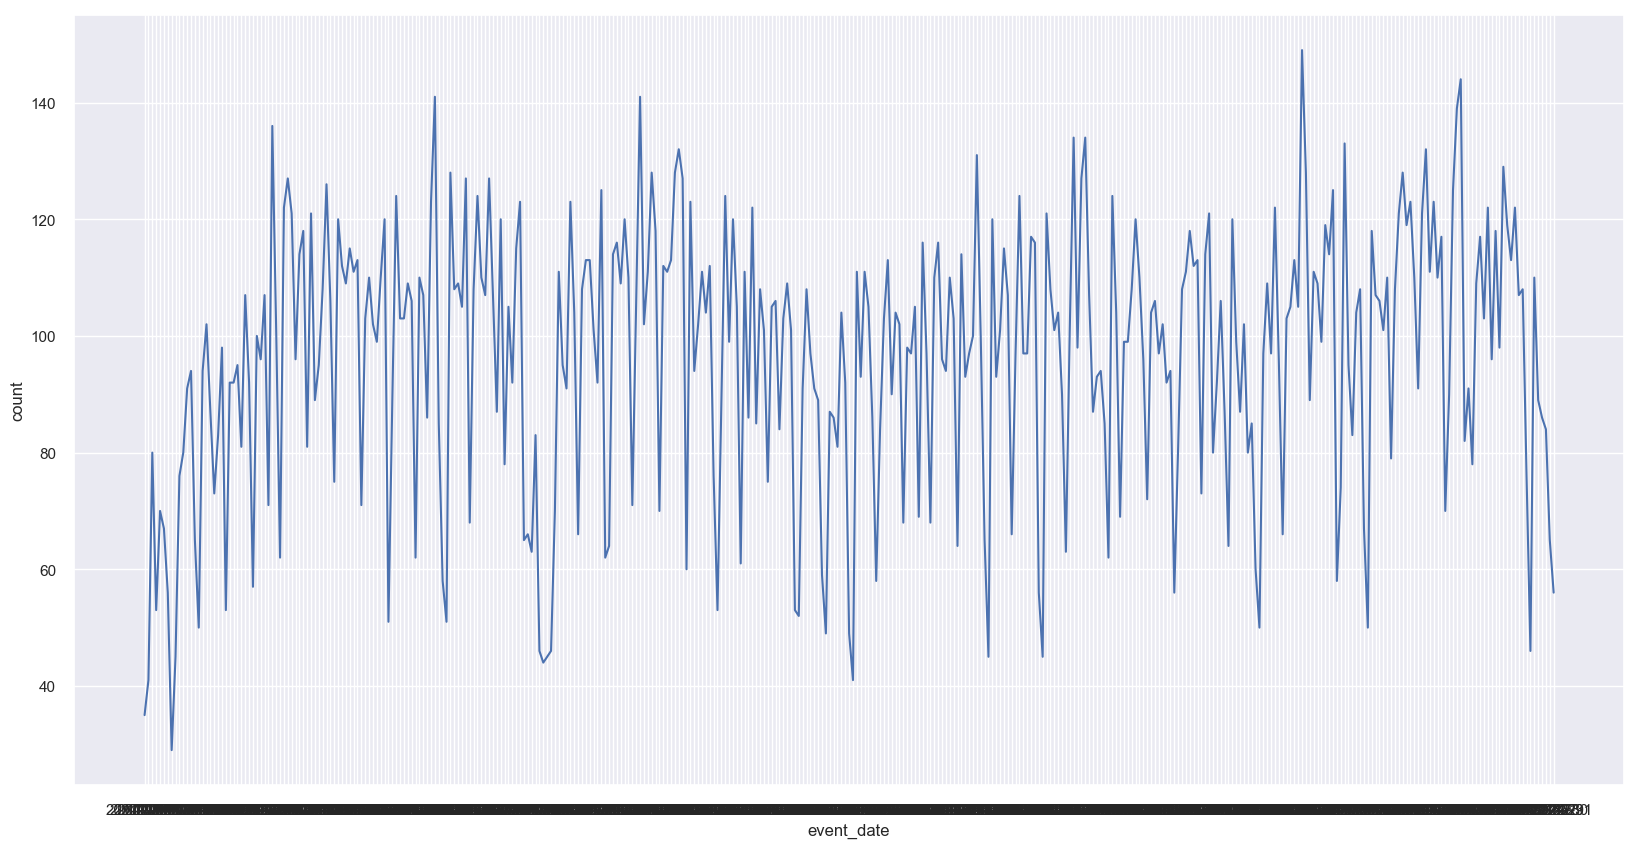

In [14]:
import seaborn as sns
sns.set(style="darkgrid")

plt.subplots(figsize=(20,10))
# Plot the responses for different events and regions
sns.lineplot(x="event_date", y="count",
             data=df_date)

In [15]:
df_date.head(10)

,event_date,count
0,2017-01-01,35
1,2017-01-02,41
2,2017-01-03,80
3,2017-01-04,53
4,2017-01-05,70
5,2017-01-06,67
6,2017-01-07,56
7,2017-01-08,29
8,2017-01-09,45
9,2017-01-10,76


# Export filtered columns  for visualization 

In [11]:
df1 = df[['event_time', 'event_date', 'event_hour', 'event_day','event_day_name','event_month', 'event_month_name',
          'GravedadNombre', 'ClaseNombre', 'ChoqueNombre', 'ObjetoFijoNombre',
 'Localidad',
 'TipoDiseño',
 'TipoTiempo',
 'CorredorVial',
 'TotalMuertos',
 'TotalHeridos',
 'CausaConductorIDesc',
 'CausaConductorIIDesc',
 'CausaPeatonIDesc',
 'CausaPeatonIIDesc',
 'CausaVehiculoIDesc',
 'CausaVehiculoIIDesc',
 'CausaPasajeroIDesc',
 'CausaViaIDesc',
 'CausaViaIIDesc']]

df1.head()

,event_time,event_date,event_hour,event_day,event_day_name,event_month,event_month_name,GravedadNombre,ClaseNombre,ChoqueNombre,...,TotalHeridos,CausaConductorIDesc,CausaConductorIIDesc,CausaPeatonIDesc,CausaPeatonIIDesc,CausaVehiculoIDesc,CausaVehiculoIIDesc,CausaPasajeroIDesc,CausaViaIDesc,CausaViaIIDesc
0,2017-04-29 15:40:00,2017-04-29,15,6,Saturday,04,April,Con Heridos,Atropello,,...,2,,,CRUZAR SIN OBSERVAR,,,,,,
1,2017-05-03 13:30:00,2017-05-03,13,3,Wednesday,05,May,Con Heridos,Choque,Vehiculo,...,2,DESOBEDECER SEÑALES,DESOBEDECER SEÑALES,,,,,,,
2,2017-05-05 11:45:00,2017-05-05,11,5,Friday,05,May,Con Heridos,Choque,Vehiculo,...,1,OTRA,,,,,,,,
3,2017-05-06 10:00:00,2017-05-06,10,6,Saturday,05,May,Con Heridos,Choque,Vehiculo,...,1,NO MANTENER DISTANCIA DE SEGURIDAD,,,,,,,,
4,2017-05-06 07:10:00,2017-05-06,07,6,Saturday,05,May,Con Heridos,Choque,Vehiculo,...,3,DESOBEDECER SEÑALES,,,,,,,,


In [12]:
#df1.to_csv("accidentes_bta.tsv", sep='\t', encoding='utf-8', index=False)
df1.to_csv("accidentes_bta.csv",  encoding='utf-8', index=False)

In [17]:
pandas_profiling.ProfileReport(df1)

Number of variables,26
Number of observations,35200
Total Missing (%),0.0%
Total size in memory,7.0 MiB
Average record size in memory,208.0 B
Numeric,2
Categorical,23
Boolean,0
Date,1
Text (Unique),0
Rejected,0
